<a href="https://colab.research.google.com/github/nyjinnn/images/blob/main/220722_Chapter8_%EC%88%98%EC%97%85%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 

In [32]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

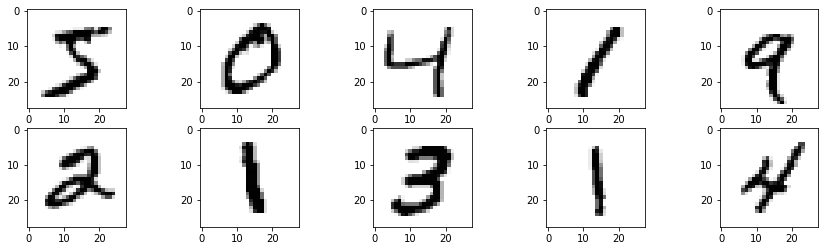

In [33]:
fig = plt.figure(figsize=(15, 4))

for i in range(10):
    plottable_image = np.reshape(x_train_all[i], (28, 28))
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(plottable_image, cmap='gray_r')

In [34]:
from sklearn.model_selection import train_test_split 
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [35]:
print("학습 데이터셋 클래스별 샘플 수 : ", np.bincount(y_train))
print("평가 데이터셋 클래스별 샘플 수 : ", np.bincount(y_valid))

학습 데이터셋 클래스별 샘플 수 :  [4738 5394 4766 4905 4674 4337 4734 5012 4681 4759]
평가 데이터셋 클래스별 샘플 수 :  [1185 1348 1192 1226 1168 1084 1184 1253 1170 1190]


In [36]:
x_train = x_train / 255
x_valid = x_valid / 255 
x_test = x_test / 255

In [37]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_valid_encoded = tf.keras.utils.to_categorical(y_valid)

In [38]:
import torch
x_train_torch = torch.FloatTensor(x_train)
y_train_torch = torch.FloatTensor(y_train_encoded)
x_valid_torch = torch.FloatTensor(x_valid)
y_valid_torch = torch.FloatTensor(y_valid_encoded) 
x_test_torch = torch.FloatTensor(x_test)
y_test_torch = torch.FloatTensor(y_test)

In [39]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [40]:
class MNISTDataset(Dataset):
  def __init__(self, x, y):
    self.x_data = x
    self.y_data = y
  
  def __getitem__(self, index):
    x = self.x_data[index]
    y = self.y_data[index]
    return x, y
  
  def collate_fn(self, batch):
    x, y = zip(*batch)
    return x, y

  def __len__(self):
    return len(self.x_data)

In [41]:
dataset = MNISTDataset(x_train_torch, y_train_torch)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)

In [50]:
x_train_torch.size()
import torch.nn as nn

model = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding="same")

model = x_train_torch.unsqueeze(1).size()

#model(x_train_torch.unsqueeze(1)[0:2).reshape(-1:,7840)


In [63]:
from tqdm import tqdm 
import random 

random_seed = 123
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

class MyModel(nn.Module):
  def __init__(self,kernel_size=3.5):
    super(MyModel, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding='same'),      
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Conv2d(in_channels=10, out_channels=1, kernel_size=3, stride=1, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3),
        nn.Dropout(0.3),
    )
    
    self.linear = nn.Linear(81, 10)
  
  def forward(self, x):
    output = self.net(x)
    output = output.view(-1, 1, 81) ##펼치는 것
    output = self.linear(output)
    return output 

def predict(self,x):
  F.log_sofmax()

  ##nn.CrossEntropyLoss에 포함되어있어서 꼭 안 넣어도 됨

In [ ]:
model = MyModel(kernel_size=3)
optim = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

global_step = 0 
for epoch in range(20):
  t = tqdm(dataloader, ncols=100)
  for i, batch in enumerate(t):
    x_batch = batch[0]
    y_batch = batch[1]
    output = model(x_batch.unsqueeze(1))
    loss = criterion(output.squeeze(1), y_batch)
    model.zero_grad() 
    optim.zero_grad()
    loss.backward()
    optim.step()

    global_step += 1
    t.set_description("epoch: {} | global_step: {:8d} | loss: {:.4f}".format(epoch + 1, global_step, loss))

  with torch.no_grad():
    model.eval()
    predicts = model(x_valid_torch.unsqueeze(1))
    predicts = torch.argmax(predicts.squeeze(1), 1)

    correct = 0 
    for i in range(len(predicts)):
      if predicts[i].item() == y_valid[i]:
        correct += 1
    acc = correct / len(predicts)
    print("epoch: {} | global_step: {} | valid acc: {:%}".format(epoch + 1, global_step, acc))
    model.train()

epoch: 1 | global_step:     1500 | loss: 1.2814: 100%|██████████| 1500/1500 [00:31<00:00, 48.05it/s]


epoch: 1 | global_step: 1500 | valid acc: 68.000000%


epoch: 2 | global_step:     3000 | loss: 1.3250: 100%|██████████| 1500/1500 [00:30<00:00, 49.01it/s]


epoch: 2 | global_step: 3000 | valid acc: 82.658333%


epoch: 3 | global_step:     4500 | loss: 0.9768: 100%|██████████| 1500/1500 [00:28<00:00, 51.87it/s]


epoch: 3 | global_step: 4500 | valid acc: 86.225000%


epoch: 4 | global_step:     6000 | loss: 0.5968: 100%|██████████| 1500/1500 [00:28<00:00, 53.12it/s]


epoch: 4 | global_step: 6000 | valid acc: 87.400000%


epoch: 5 | global_step:     7500 | loss: 0.7153: 100%|██████████| 1500/1500 [00:28<00:00, 52.38it/s]


epoch: 5 | global_step: 7500 | valid acc: 88.216667%


epoch: 6 | global_step:     9000 | loss: 0.3088: 100%|██████████| 1500/1500 [00:27<00:00, 55.47it/s]


epoch: 6 | global_step: 9000 | valid acc: 88.783333%


epoch: 7 | global_step:    10500 | loss: 0.4391: 100%|██████████| 1500/1500 [00:26<00:00, 56.69it/s]


epoch: 7 | global_step: 10500 | valid acc: 89.166667%


epoch: 8 | global_step:    12000 | loss: 0.4173: 100%|██████████| 1500/1500 [00:26<00:00, 56.34it/s]


epoch: 8 | global_step: 12000 | valid acc: 89.400000%


epoch: 9 | global_step:    13500 | loss: 0.5260: 100%|██████████| 1500/1500 [00:26<00:00, 56.75it/s]


epoch: 9 | global_step: 13500 | valid acc: 89.250000%


epoch: 10 | global_step:    15000 | loss: 0.4765: 100%|█████████| 1500/1500 [00:26<00:00, 56.37it/s]


epoch: 10 | global_step: 15000 | valid acc: 89.408333%


epoch: 11 | global_step:    16500 | loss: 0.5997: 100%|█████████| 1500/1500 [00:27<00:00, 54.28it/s]


epoch: 11 | global_step: 16500 | valid acc: 89.825000%


epoch: 12 | global_step:    18000 | loss: 0.3316: 100%|█████████| 1500/1500 [00:31<00:00, 47.38it/s]


epoch: 12 | global_step: 18000 | valid acc: 89.958333%


epoch: 13 | global_step:    19500 | loss: 0.4401: 100%|█████████| 1500/1500 [00:34<00:00, 43.29it/s]


epoch: 13 | global_step: 19500 | valid acc: 89.958333%


epoch: 14 | global_step:    21000 | loss: 0.3793: 100%|█████████| 1500/1500 [00:32<00:00, 46.48it/s]


epoch: 14 | global_step: 21000 | valid acc: 90.075000%


epoch: 15 | global_step:    22500 | loss: 0.7501: 100%|█████████| 1500/1500 [00:30<00:00, 48.62it/s]


epoch: 15 | global_step: 22500 | valid acc: 90.325000%


epoch: 16 | global_step:    24000 | loss: 0.3750: 100%|█████████| 1500/1500 [00:36<00:00, 41.47it/s]


epoch: 16 | global_step: 24000 | valid acc: 90.375000%


epoch: 17 | global_step:    25500 | loss: 0.5641: 100%|█████████| 1500/1500 [00:32<00:00, 45.81it/s]


epoch: 17 | global_step: 25500 | valid acc: 90.533333%


epoch: 18 | global_step:    27000 | loss: 0.5266: 100%|█████████| 1500/1500 [00:37<00:00, 40.44it/s]


epoch: 18 | global_step: 27000 | valid acc: 90.533333%


epoch: 19 | global_step:    28500 | loss: 0.5824: 100%|█████████| 1500/1500 [00:41<00:00, 35.76it/s]


epoch: 19 | global_step: 28500 | valid acc: 90.666667%


epoch: 20 | global_step:    29455 | loss: 0.6513:  64%|██████▎   | 955/1500 [00:24<00:16, 33.59it/s]

In [59]:
with torch.no_grad():
  model.eval()
  predict = model(x_test_torch.unsqueeze(1))
  predict = torch.argmax(predict.squeeze(1), 1)

In [60]:
correct = 0 
for i in range(len(predict)):
  if predict[i].item() == y_test[i]:
    correct += 1
acc = correct/len(predict)
print("Test accuracy : {:.2%}".format(acc))

Test accuracy : 85.89%


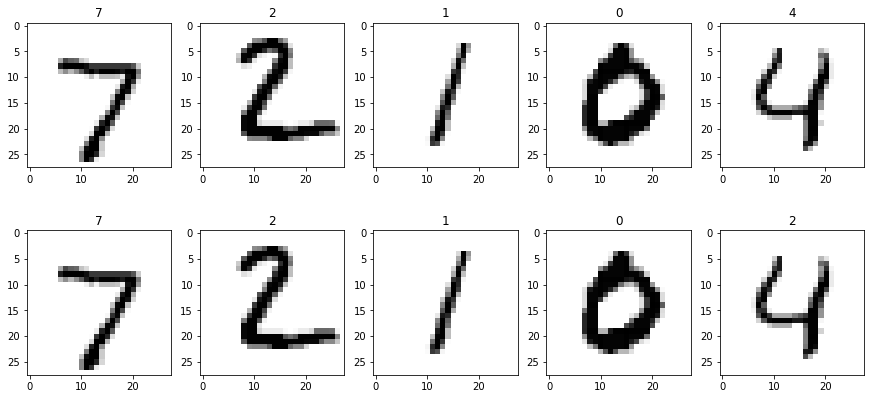

In [61]:
fig = plt.figure(figsize=(15, 7))

for i in range(5):
    plottable_image = x_test[i]
    ax = fig.add_subplot(2, 5, i+1)
    ax.title.set_text(str(y_test[i]))
    ax.imshow(plottable_image, cmap='gray_r')
  
for i in range(5):
    plottable_image = x_test[i]
    ax = fig.add_subplot(2, 5, i+6)
    ax.title.set_text(str(predict[i].item()))
    ax.imshow(plottable_image, cmap='gray_r')

plt.show()

In [55]:
###### M E M O ######

## [220722] 합성곱신경망

## 스트라이드
## 밸리드 패딩/ 풀패딩(아웃풋 배수가 많아진다는 단점이 있음)
## 
## 
## 보통 패딩"valid" "same" 두가지!
## ㅍ
## padding "VALID" > 패딩을 안 주는 것과 같음
## 
## 
## paddind "SAME" > 인풋.아웃풋 똑같이 맞추고 싶은 것
## > zero padding
## >reflect padding
## 
## 
## 풀링 : 최대풀링, 평균 풀링
## 커널 갯수가 많아질수록 많은 정보를 보게 된당
## 
## 
## 합성곱층 > 활성화함수(ReLU) > 풀링층 > 펼쳐서 > 완전 연결층(소프트맥스 함수) > 출력
## 
## 
## x_train_torch.size()
## import torch.nn as nn
## 
## [리니어 대신 얘네를 넣으면 된당]
## model = nn.Conv2d(in_cahnnels=1, out_chanenels=10, kernel_sizw=3, stride=1, padding="same")
## 
## model = x_train_torch.unsqueeze(1).size()
## 
## model(x_train_torch.x_train_torch.insqueeze(1)[0:2).reshape(-2:,7840)
## 
## 
## 
## 클래스 만들고 (반드시 nn.module을 써줘야함
## init했을 때 super(MyModel, self).__init__() 이거 무조건 넣어줘야함
## 마지막에 맥스풀 취하고 드롭아웃!
## 
## [펼치는걸 하고싶으면]
## 
## 
## break 걸고 x 넣어보고 갯수를 세야함
## 	output = self.net(x)
## 	breakpoint()
## nn.Sequential을 쓰되 클래스를 써서 받아와야함
## 
## 
## 커널사이즈 [3,5,3]
## 
## [0]
## [1]
## [2]
## 
## 드랍아웃은 혼자 공부해랑..
## 
## 
## 
## Dropout(0.3) > 0.3을 없애겠다...
## 보통 0.3,0.2 많이 씀'


##https://ko.d2l.ai/chapter_introduction/deep-learning-intro.html#%EB%94%A5-%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C%EC%9D%98-%EA%B8%B8
## 넘 느리면 GPU로 돌리면 된당



### 과제!!!!!!
### 싸이파10 데이터 ... 테스트 어큐러시가 높게 나오면 됨!!